<a href="https://colab.research.google.com/github/reg4762/PVCK_Ganjil_2024/blob/main/Week6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Job Sheet 6
## Nama : Regita Delya Putri
## Absen : 21
## Nim : 2241720137
## Kelas : TI-3F


---



## Tugas Praktikum

### 1. Buka https://colab.research.google.com/. Setelah dipastikan bahwa google Colab terhubung dengan Github Anda, lanjutkan dengan memilih repository yang telah digunakan pada praktikum minggu lalu, rename file menjadi “Week6.ipynb”.

In [82]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


### 2. Import beberapa library berikut yang akan digunakan selama uji coba praktikum minggu ke-6 berikut.


In [83]:
import cv2 as cv
from google.colab.patches import cv2_imshow
import numpy as np
import matplotlib.pyplot as plt
from skimage import io
import math
import os
import glob

### 3. Buatlah histogram citra seperti output histogram berikut berdasarkan flowchart di bawah ini : (Gunakan gambar lena.jpg)

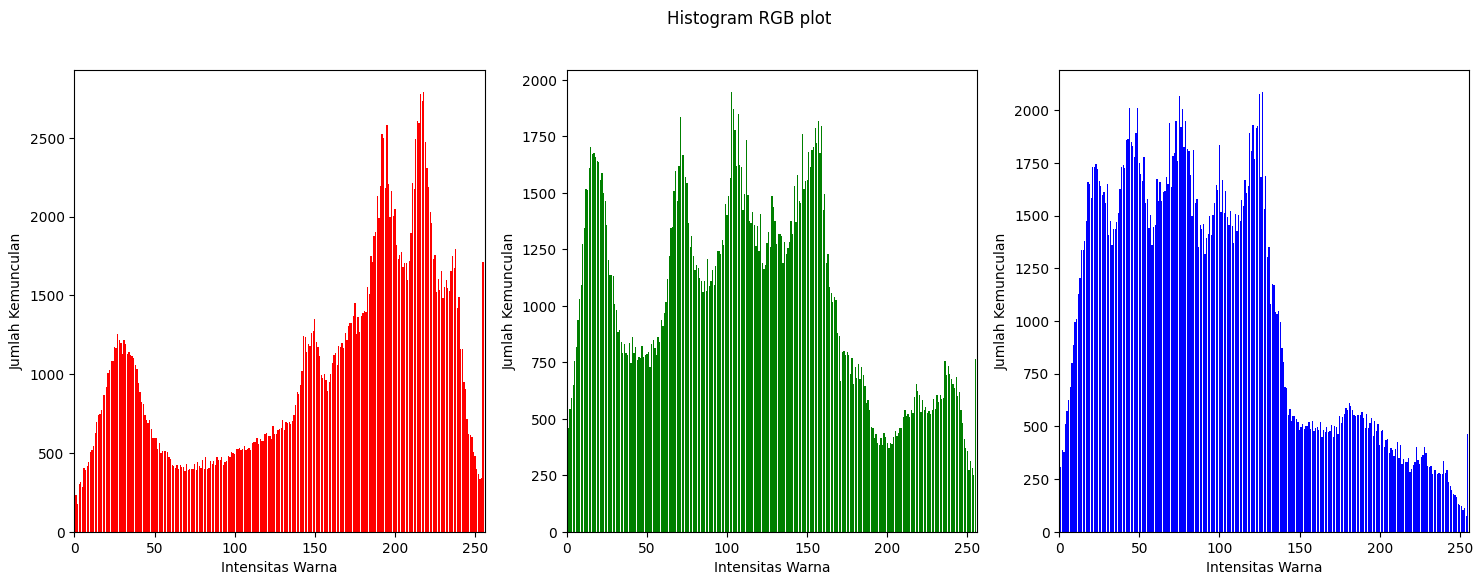

In [84]:
image_pathh = '/content/drive/MyDrive/PVCK/Images/lena.jpg'
img = cv2.imread(image_pathh)

channels = ['r', 'g', 'b']
colors = ['red', 'green', 'blue']

plt.figure(figsize=(18, 6))

for i, col in enumerate(colors):
    plt.subplot(1, 3, i+1)
    histogram = cv2.calcHist([img], [2-i], None, [256], [0, 256])
    plt.bar(np.arange(256), histogram[:,0], color=col)
    plt.xlim([0, 256])
    plt.xlabel('Intensitas Warna')
    plt.ylabel('Jumlah Kemunculan')

# Menampilkan histograms
plt.suptitle("Histogram RGB plot")
plt.show()


### 4. Setelah mengerjakan soal no. 3, buatlah histogram citra yang sama akan tetapi menggunakan library yang dimiliki oleh NumPy yaitu “histogram”. Bandingkan hasilnya. Apakah output muncul sama?


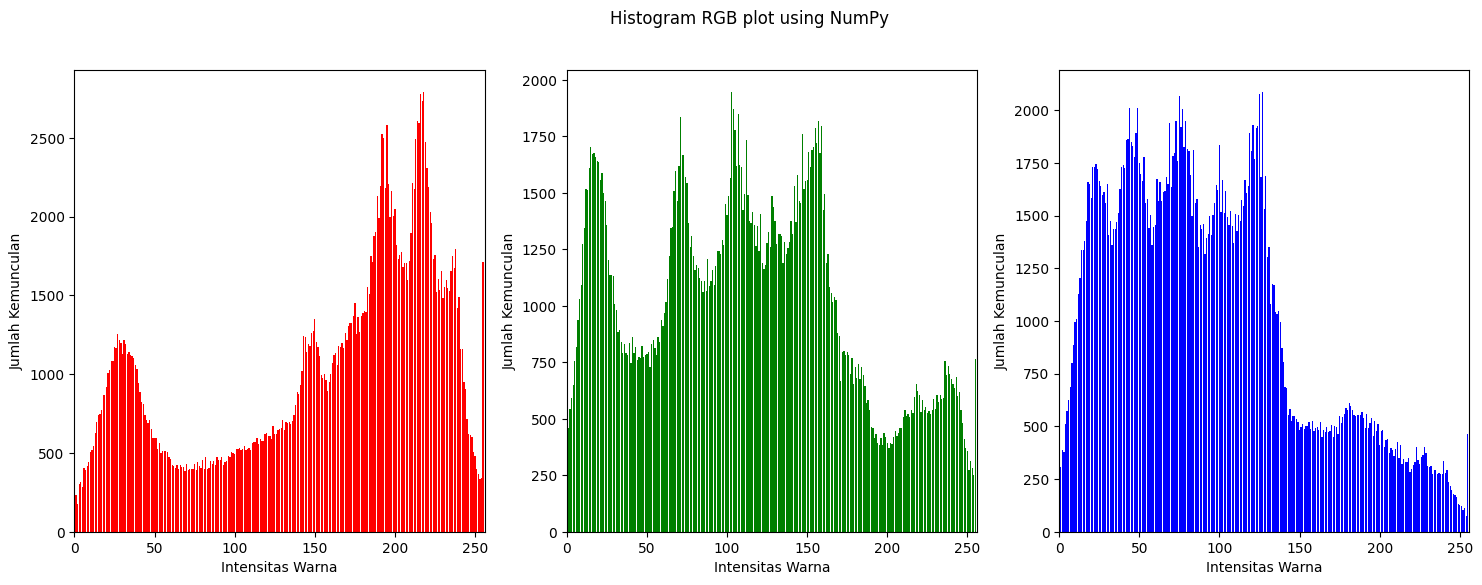

In [85]:
image_path = '/content/drive/MyDrive/PVCK/Images/lena.jpg'
img = cv2.imread(image_path)
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

r, g, b = cv2.split(img)

plt.figure(figsize=(18, 6))

for i, channel in enumerate([r, g, b]):
    plt.subplot(1, 3, i+1)
    histogram, bins = np.histogram(channel, bins=256, range=(0, 256))
    plt.bar(bins[:-1], histogram, color=['red', 'green', 'blue'][i])
    plt.xlim([0, 256])
    plt.xlabel('Intensitas Warna')
    plt.ylabel('Jumlah Kemunculan')

plt.suptitle("Histogram RGB plot using NumPy")
plt.show()

### 5. Buatlah histogram citra seperti output histogram equalization dan juga tampilan gambar sebelum dan sesudah proses histogram equalization berikut berdasarkan flowchart di bawah ini : (Gunakan gambar lena_lc.jpg)


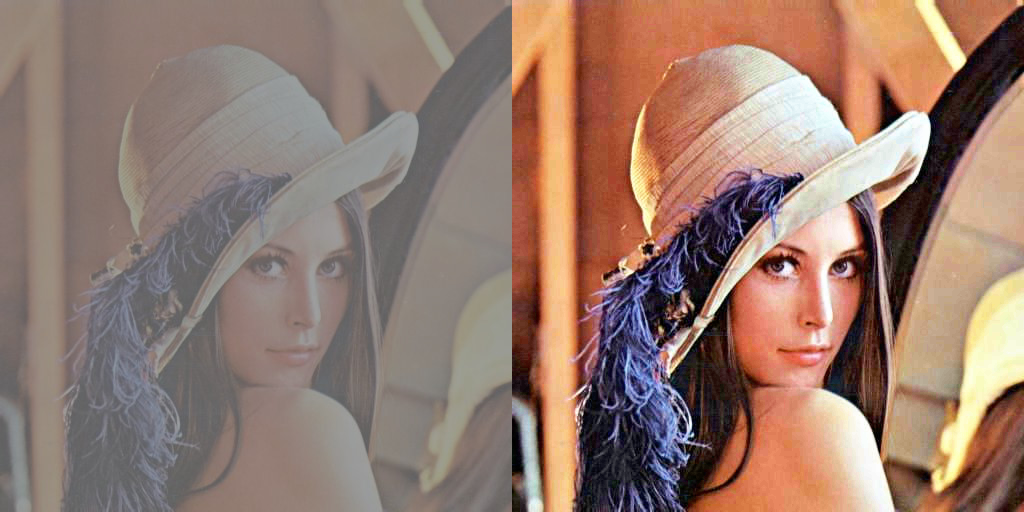

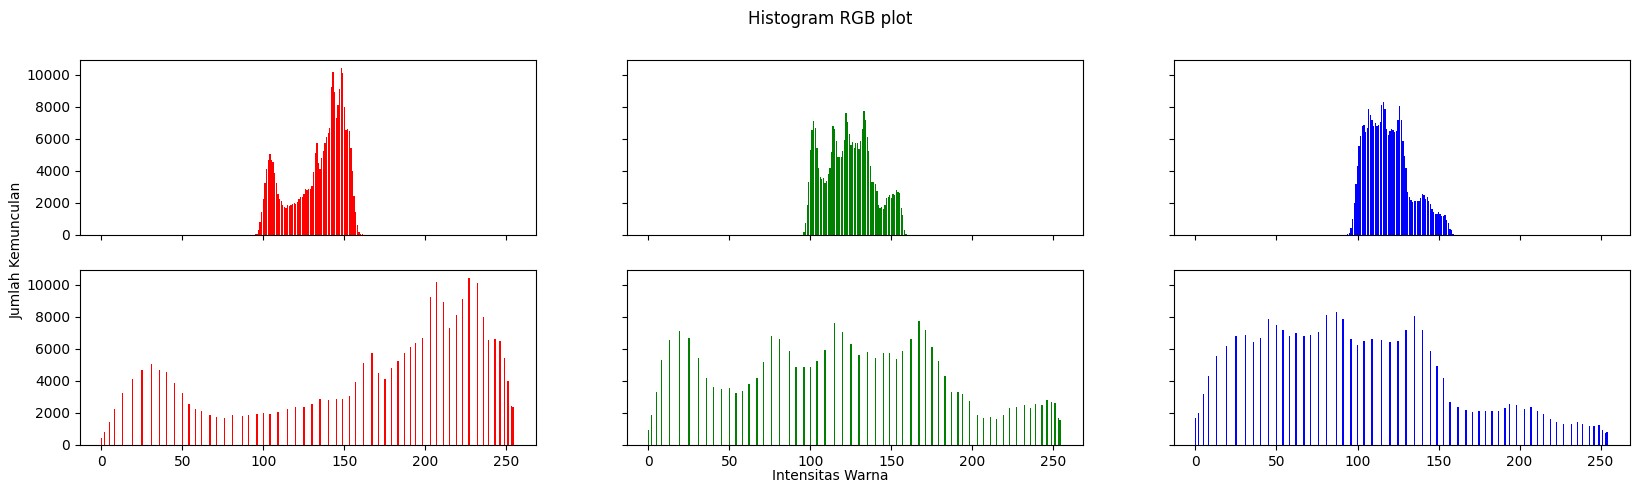

In [86]:
img_lena_lc = cv.imread('/content/drive/MyDrive/PVCK/Images/lena_lc.jpg')

def histog(img_lena_lc):
  height, width, depth = np.shape(img_lena_lc)
  ax = np.zeros((3,256))
  for y in range(0,height) :
    for x in range(0,width) :
      ax[0][img_lena_lc[y][x][0]] += 1
      ax[1][img_lena_lc[y][x][1]] += 1
      ax[2][img_lena_lc[y][x][2]] += 1
  return ax

histo_asli = histog(img_lena_lc)

img_array = np.asarray(img_lena_lc)

histogram_array = np.bincount(img_array.flatten(), minlength=256)

num_pixels = np. sum(histogram_array)
histogram_array = histogram_array/num_pixels

chistogram_array = np.cumsum(histogram_array)
transform_map = np.floor(255 * chistogram_array). astype (np.uint8)
img_list = list(img_array.flatten())

eq_img_list = [transform_map[p] for p in img_list]

eq_img_array = np.reshape(np.asarray(eq_img_list), img_array.shape)
img2 = eq_img_array

equal_histo = histog(img2)

final_frame = cv.hconcat((img_lena_lc, img2))
cv2_imshow(final_frame)

names = np.arange (256)
isgrayimg = np.all(blue == green) and np.all(green == red)
if (isgrayimg == False):
  fig, axs = plt.subplots(2, 3, figsize=[20,5], sharex=True, sharey=True)
  fig.suptitle('Histogram RGB plot')
  fig.text(0.09, 0.5, 'Jumlah Kemunculan', va='center', rotation='vertical')
  fig.text(0.5, 0.04, 'Intensitas Warna', ha='center')
  axs[0,0].bar(names, histo_asli[2], color='red')
  axs[0,1].bar(names, histo_asli[1], color='green')
  axs[0,2].bar(names, histo_asli[0], color='blue')
  axs[1,0].bar(names, equal_histo[2], color='red')
  axs[1,1].bar(names, equal_histo[1], color='green')
  axs[1,2].bar(names, equal_histo[0], color='blue')
else:
  fig, axs = plt. subplots(1, 2, figsize=[20,5], sharex=True, sharey=True)
  fig. suptitle('Histogram RGB plot')
  fig.text(0.09, 0.5, 'Jumlah Kemunculan', va='center', rotation='vertical')
  fig.text(0.5, 0.94, 'Intensitas Warna', ha='center')
  axs[0,0].bar(names, histo_asli[2], color='gray')
  axs[0,1].bar(names, equal_histo[2], color='gray')

### 6. Setelah mengerjakan soal no. 5, buatlah histogram citra yang sama akan tetapi menggunakan library yang dimiliki oleh CV2 yaitu “equalizeHist”. Bandingkan hasilnya. Apakah output muncul sama?

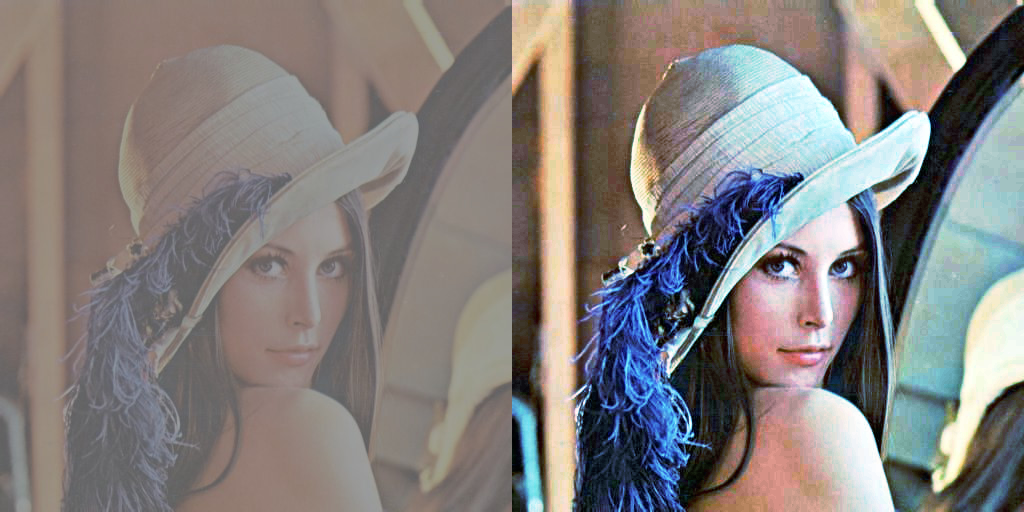

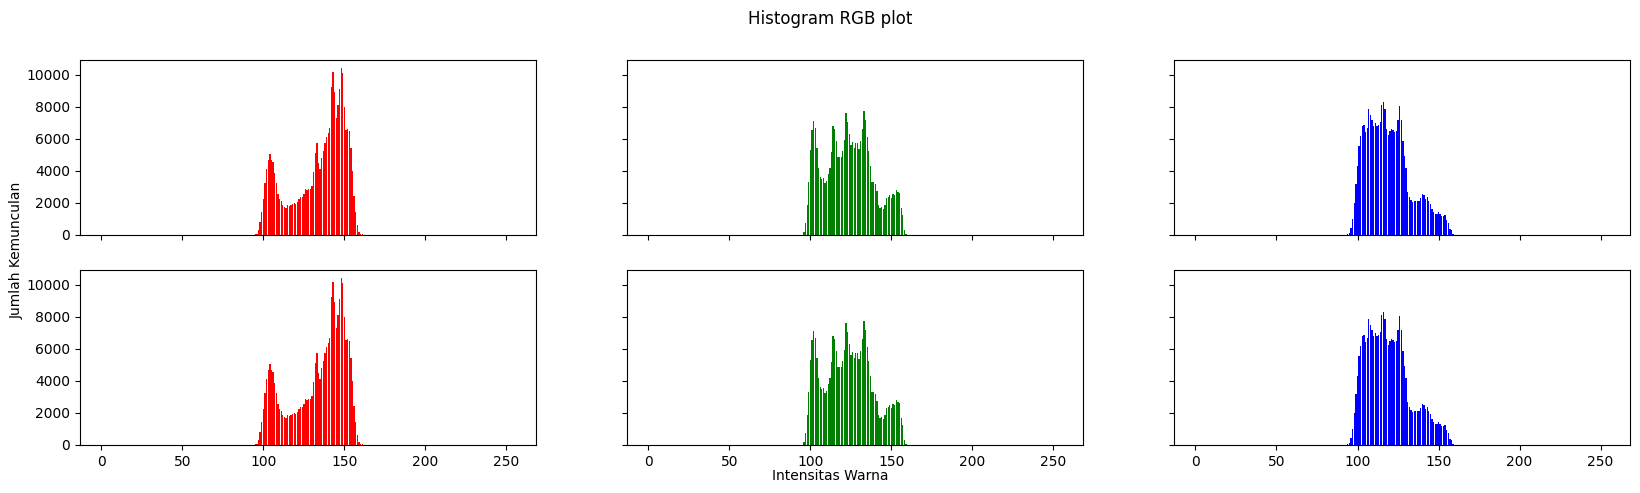

In [87]:
img_lena_lc = cv.imread('/content/drive/MyDrive/PVCK/Images/lena_lc.jpg')

channels = cv.split(img_lena_lc)
eq_channels = []
for ch, color in zip(channels, ["r", "g", "b"]):
  eq_channels.append(cv.equalizeHist(ch))
eq_image = cv.merge(eq_channels)
equal_histo = histog(eq_image)

final_frame = cv.hconcat((img_lena_lc, eq_image))
cv2_imshow(final_frame)

names = np.arange(256)
isgrayimg = np.all(blue == green) and np.all(green == red)
# Changed 'isgraying' to 'isgrayimg' in the if statement
if (isgrayimg == False): # This line was changed
  fig, axs = plt.subplots(2, 3, figsize=[20,5], sharex=True, sharey =True)
  fig.suptitle('Histogram RGB plot')
  fig.text(0.09, 0.5, 'Jumlah Kemunculan', va='center', rotation='vertical')
  fig.text(0.5, 0.04, 'Intensitas Warna', ha='center')
  axs[0,0].bar(names, histo_asli[2], color='red')
  axs[0,1].bar(names, histo_asli[1], color='green')
  axs[0,2].bar(names, histo_asli[0], color='blue')
  axs[1,0].bar(names, histo_asli[2], color='red')
  axs[1,1].bar(names, histo_asli[1], color='green')
  axs[1,2].bar(names, histo_asli[0], color='blue')
else:
  fig, axs = plt.subplots(1, 2, figsize=[20,5], sharex=True, sharey=True)
  fig.suptitle('Histogram RGB plot')
  fig.text(0.09, 0.5, 'Jumlah Kemunculan', va='center', rotation='vertical')
  fig.text(0.5, 0.04, 'Intensitas Warna', ha='center')
  axs[0,0].bar(names, histo_asli[2], color='gray')
  axs[0,1].bar(names, equal_histo[2], color='gray')

### 7. Lakukanlah proses pemetaan 16 juta warna RGB ke dalam 8 warna saja, yaitu hitam, hijau, kuning, biru, cyan, magenta, putih seperti output berikut berdasarkan flowchart di bawah ini! (Gunakan gambar lena.jpg)

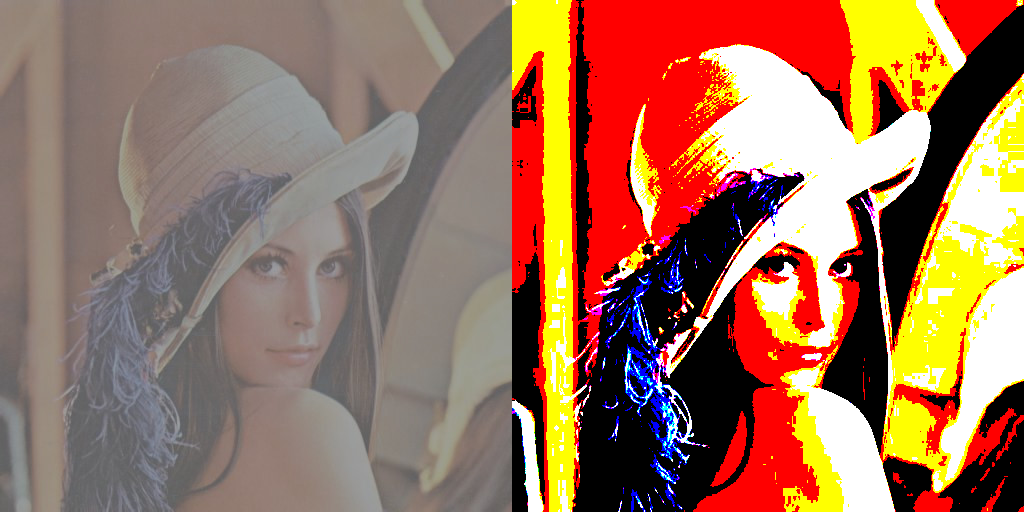

True

In [88]:
img_lena = cv.imread('/content/drive/MyDrive/PVCK/Images/lena.jpg')

channels = cv.split(img_lena)
def warnaTerdekat (r, g, b):
  pValue = 0
  minDistance = 255*255 + 255*255 + 255*255 + 1
  warnaPallette = [[0, 0, 0], [255, 0, 0], [0, 255, 0], [255, 255, 0], [0, 0, 255], [255, 0, 255], [0, 255, 255], [255, 255, 255]]
  for i in range(len(warnaPallette)):
    rDiff = r - warnaPallette[i][0]
    gDiff = g - warnaPallette[i][1]
    bDiff = b - warnaPallette[i][2]
    distance = rDiff*rDiff + gDiff*gDiff + bDiff*bDiff
    if (distance < minDistance):
      minDistance = distance
      pValue = i
  return pValue

warnaPallette = [[0, 0, 0], [255, 0, 0], [0, 255, 0], [255, 255, 0], [0, 0, 255], [255, 0, 255], [0, 255, 255], [255, 255, 255]]
img_16 = cv.cvtColor(img_lena_lc, cv.COLOR_BGR2RGB)
img_8 = np.zeros(img_16.shape, img_16.dtype)

for y in range(0, img_16.shape[0]):
  for x in range(0, img_16.shape[1]):
    baru = warnaTerdekat(img_16[y, x, 0], img_16[y, x, 1], img_16[y, x, 2])
    img_8[y, x] = warnaPallette[baru]

img_16 = cv.cvtColor(img_16, cv.COLOR_BGR2RGB)
img_8 = cv.cvtColor(img_8, cv.COLOR_BGR2RGB)
final_frame = cv.hconcat((img_16, img_8))
cv2_imshow(final_frame)
cv.imwrite('/content/drive/MyDrive/PVCK/Images/lena.jpg', img_8)

### 8. Lakukanlah proses dithering Floyd and Steinberg seperti output berikut (tampilan image awal, dan tampilan setelah dithering) berdasarkan flowchart di bagian bawah halaman modul ini! (Gunakan gambar lena.jpg)

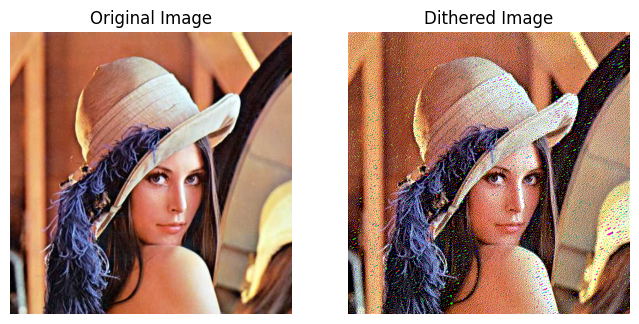

In [96]:
img = cv.imread('/content/drive/MyDrive/PVCK/Images/lena.jpg')
img = img

plt.figure(figsize=(8, 4))
plt.subplot(1, 2, 1)
plt.imshow(cv.cvtColor(img, cv.COLOR_BGR2RGB))
plt.axis('off')
plt.title('Original Image')

def floyd_steinberg_dithering_channel(image_channel):
    height, width = image_channel.shape
    new_channel = np.copy(image_channel)
    for y in range(height):
        for x in range(width):
            old_pixel = new_channel[y, x]
            new_pixel = 255 if old_pixel > 128 else 0
            error = old_pixel - new_pixel
            new_channel[y, x] = new_pixel
            if x < width - 1:
                new_channel[y, x + 1] += error * 7 / 16
            if x > 0 and y < height - 1:
                new_channel[y + 1, x - 1] += error * 3 / 16
            if y < height - 1:
                new_channel[y + 1, x] += error * 5 / 16
            if x < width - 1 and y < height - 1:
                new_channel[y + 1, x + 1] += error * 1 / 16
    return new_channel

b, g, r = cv.split(img)

dithered_b = floyd_steinberg_dithering_channel(b)
dithered_g = floyd_steinberg_dithering_channel(g)
dithered_r = floyd_steinberg_dithering_channel(r)

dithered_img = cv.merge((dithered_b, dithered_g, dithered_r))

plt.subplot(1, 2, 2)
plt.imshow(cv.cvtColor(dithered_img, cv.COLOR_BGR2RGB))
plt.title('Dithered Image')
plt.axis('off')

plt.show()

### 9. Menggunakan lena_lc.jpg rubah menjadi grey image, kemudian terapkan histogram equalization sehingga terjadi perbaikan sebaran warna pada citra. Setelah itu dari hasil histogram equalization implementasikan proses dithering Floyd and Steinberg sehingga menampilkan gambar di bawah ini!


Gambar Perbandingan


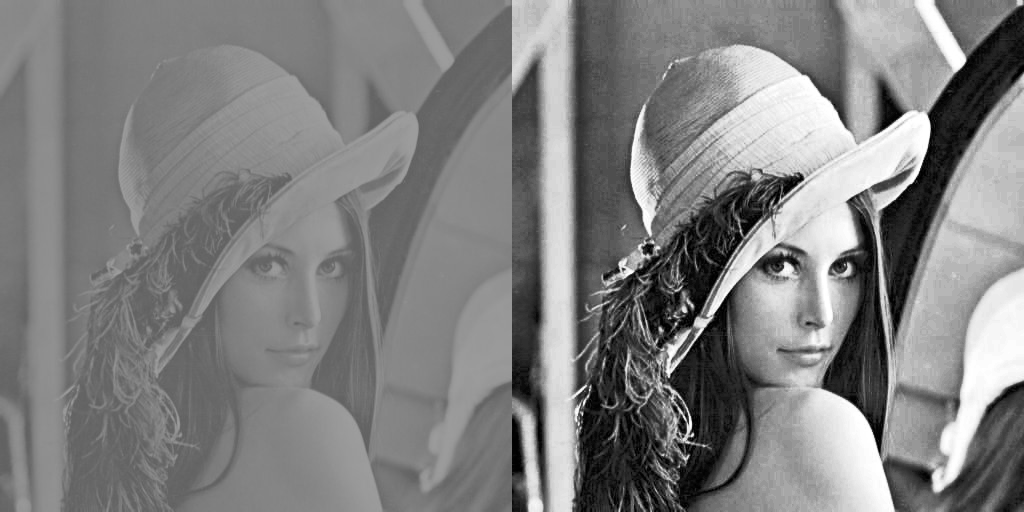

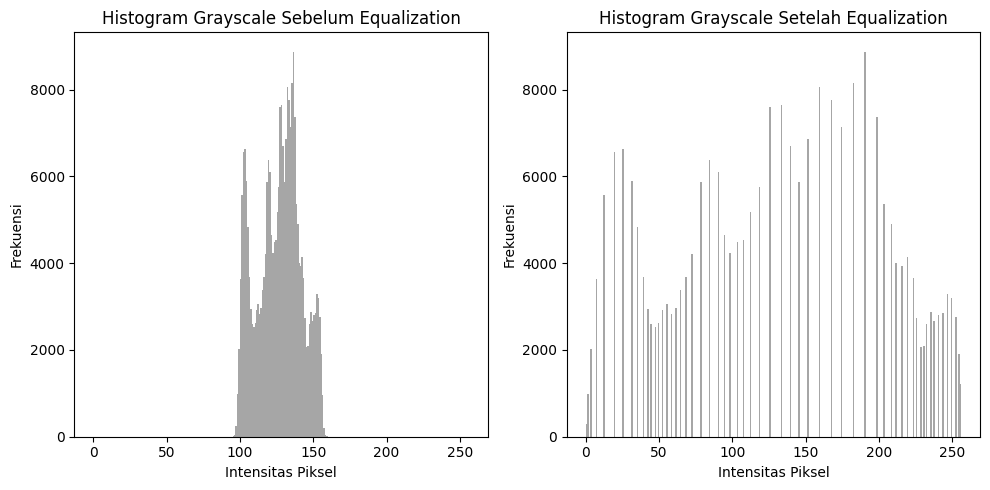

 
Gambar Dithering Floyd and Steinberg


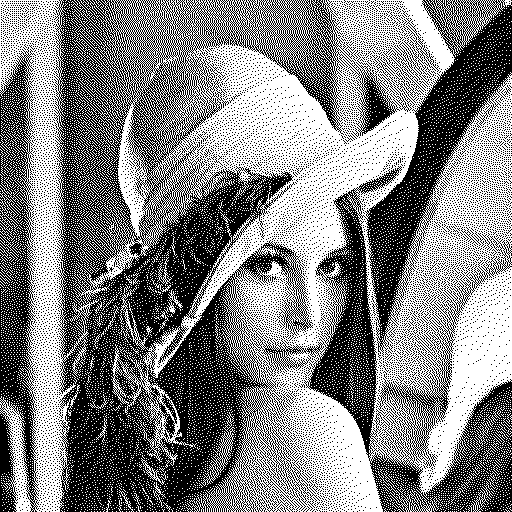

In [97]:
img = cv2.imread('/content/drive/MyDrive/PVCK/Images/lena_lc.jpg', cv2.IMREAD_GRAYSCALE)

equalized_img = cv2.equalizeHist(img)

img_float = np.float32(equalized_img)
height, width = img.shape

for y in range(height):
    for x in range(width):
        old_value = img_float[y, x]
        new_value = round(old_value / 255) * 255
        img_float[y, x] = new_value

        error = old_value - new_value

        if x < width - 1:
            img_float[y, x + 1] += error * 7 / 16
        if y < height - 1:
            if x > 0:
                img_float[y + 1, x - 1] += error * 3 / 16
            img_float[y + 1, x] += error * 5 / 16
            if x < width - 1:
                img_float[y + 1, x + 1] += error * 1 / 16

output_img = np.uint8(img_float)

final_frame = cv2.hconcat((img, equalized_img))

print('Gambar Perbandingan')
cv2_imshow(final_frame)

plt.figure(figsize=(10, 5))
plt.subplot(121)
plt.hist(img.ravel(), bins=256, range=(0, 256), color='gray', alpha=0.7)
plt.title('Histogram Grayscale Sebelum Equalization')
plt.xlabel('Intensitas Piksel')
plt.ylabel('Frekuensi')

plt.subplot(122)
plt.hist(equalized_img.ravel(), bins=256, range=(0, 256), color='gray', alpha=0.7)
plt.title('Histogram Grayscale Setelah Equalization')
plt.xlabel('Intensitas Piksel')
plt.ylabel('Frekuensi')

plt.tight_layout()
plt.show()

print(' ')

print('Gambar Dithering Floyd and Steinberg')
cv2_imshow(output_img)
plt.show()
